In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("TrafficTwoMonth.csv")

In [3]:
print(df.head())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  


In [4]:
#get rid of the date in the time column
def convert_to_military_time(time_str):
    try:
        # Try to parse as 12-hour format
        return pd.to_datetime(time_str, format='%I:%M:%S %p').strftime('%H:%M:%S')
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')

df['Time'] = df['Time'].apply(convert_to_military_time)

#replace string attributes with numerical values in the Time column to use it in the model
df['Time'] = df['Time'].str.replace(':', '').astype(int)

# display new time column
df['Time'].head()

0        0
1     1500
2     3000
3     4500
4    10000
Name: Time, dtype: int32

In [5]:
#label encoding - use this on categorical data
Le = LabelEncoder()
df['Day of the week'] = Le.fit_transform(df['Day of the week'])

#create our X and y variables for the model
X = df.drop(columns=["Traffic Situation"]) #features
y = df["Traffic Situation"] #target variable

#label encoding for the target variable
y = Le.fit_transform(y)

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 99.66%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.98      0.98        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      0.99      0.99      1191
weighted avg       1.00      1.00      1.00      1191



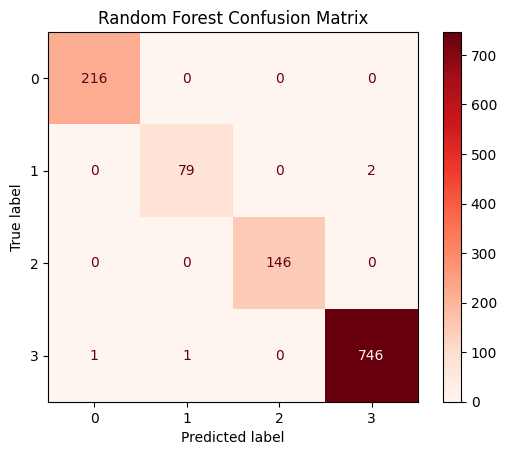

In [8]:
#train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Random Forest Confusion Matrix")
plt.show()

Accuracy: 99.83%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.99      0.99        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



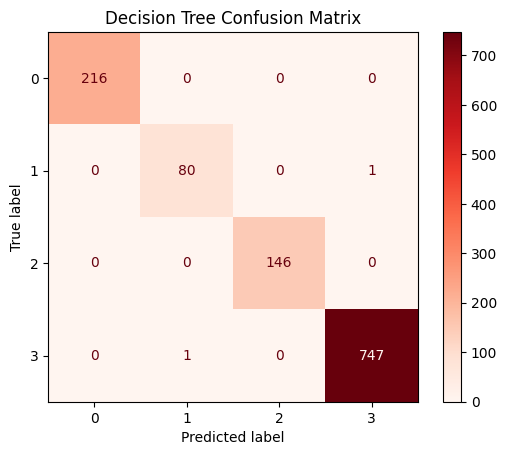

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.show()